In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import pickle
from IPython.display import display, HTML
from sklearn.pipeline import make_pipeline


In [2]:
# Load dataset
df = pd.read_csv("Algerian_forest_fires_cleaned.csv")
print(df.head())
print(df.tail())

   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          0  
1  0.4  not fire          0  
2  0.1  not fire          0  
3  0.0  not fire          0  
4  0.5  not fire          0  
     day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
238   26      9  2012           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9   
239   27      9  2012           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
240   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4   
241   29      9  2012           2

In [3]:
#checking for missing values
print(df.isnull().sum())

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


In [4]:
df.dtypes


,0
day,int64
month,int64
year,int64
Temperature,int64
RH,int64
Ws,int64
Rain,float64
FFMC,float64
DMC,float64
DC,float64


In [5]:

df.describe()
'''
Insights:
1.  Total number of rows 243
2. No missing values
3. Duplicates are not necessary to remove
4. Ave temp: 32.15c,  Min temp: 22c,Max temp: 42c - its important to know these as they are directly linked to fuel dryness and fire ignition potential
5. FWI: Mean is 7.04 and range is from 0 to 31.1
  - High STD of 7.44 suggests that ther is signicant fluctuations in fire risk
'''


'\nInsights:\n1.  Total number of rows 243\n2. No missing values\n3. Duplicates are not necessary to remove\n4. Ave temp: 32.15c,  Min temp: 22c,Max temp: 42c - its important to know these as they are directly linked to fuel dryness and fire ignition potential\n5. FWI: Mean is 7.04 and range is from 0 to 31.1\n  - High STD of 7.44 suggests that ther is signicant fluctuations in fire risk\n'

In [7]:
html_code = """
<table border="1" cellpadding="8" cellspacing="0">
  <thead>
    <tr>
      <th>FWI Value Range</th>
      <th>Fire Risk Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0 – 5</td>
      <td>Low fire intensity</td>
    </tr>
    <tr>
      <td>5 – 10</td>
      <td>Moderate fire intensity</td>
    </tr>
    <tr>
      <td>10 – 20</td>
      <td>High fire intensity</td>
    </tr>
    <tr>
      <td>20 – 30</td>
      <td>Very high intensity</td>
    </tr>
    <tr>
      <td>30+</td>
      <td>Extreme fire behavior likely</td>
    </tr>
  </tbody>
</table>
"""

display(HTML(html_code))


FWI Value Range,Fire Risk Description
0 – 5,Low fire intensity
5 – 10,Moderate fire intensity
10 – 20,High fire intensity
20 – 30,Very high intensity
30+,Extreme fire behavior likely


In [10]:
#Dropping classes as part of feature eng, not needed for Linear Regression, as we will use FWI as Target

df = df.drop(columns=['Classes'])




KeyError: "['Classes'] not found in axis"

In [24]:
df = df.drop(columns=['year'])
#year is dropped as its not necessary as well because they are all 2012

KeyError: "['year'] not found in axis"

In [25]:
df.head()


,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [18]:
html_code = """
<h1>Region Description</h1>
<h2>Bejaia</h2>
<ul>
  <li><strong>Location:</strong> Northeast Algeria, near the Mediterranean coast.</li>
  <li><strong>Climate:</strong> Humid and mild - prone to forest fires in dry seasons.</li>
  <li><strong>Geography:</strong> Mountainous terrain with dense forests.</li>
  <li><strong>Dataset label:</strong> Region = 0</li>
</ul>

<h2>Sidi-Bel-Abbès</h2>
<ul>
  <li><strong>Location:</strong> Northwestern Algeria, inland.</li>
  <li><strong>Climate:</strong> Drier and hotter - typical of the steppe region.</li>
  <li><strong>Geography:</strong> Less forested than Bejaia but still fire-prone.</li>
  <li><strong>Dataset label:</strong> Region = 1</li>
</ul>
"""

display(HTML(html_code))



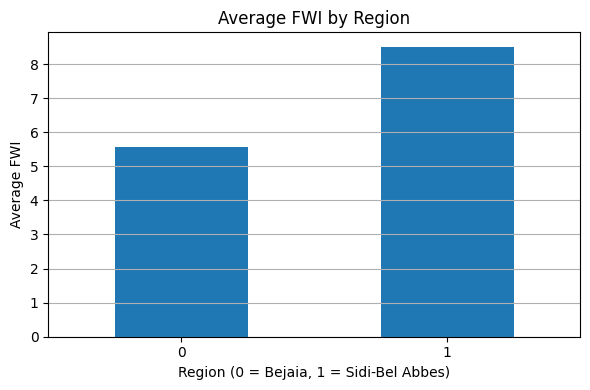

In [13]:
#EDA on Region to show which region is most likely affected by FWI
region_fwi = df.groupby('Region')['FWI'].mean()

# Plot the real values from your dataset
region_fwi.plot(kind='bar', figsize=(6, 4))
plt.title('Average FWI by Region')
plt.xlabel('Region (0 = Bejaia, 1 = Sidi-Bel Abbes)')
plt.ylabel('Average FWI')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



In [26]:
display(HTML("""
<div style="margin-top: 10px; font-size: 16px;">
    <strong>Conclusion:</strong><br>
    Sidi-Bel Abbes (<code>Region = 1</code>) has a higher average FWI compared to Bejaia (<code>Region = 0</code>).<br>
    <span style="color: firebrick;"><strong>Therefore, Sidi-Bel Abbes is more likely to experience intense fire weather conditions.</strong></span>
</div>
"""))


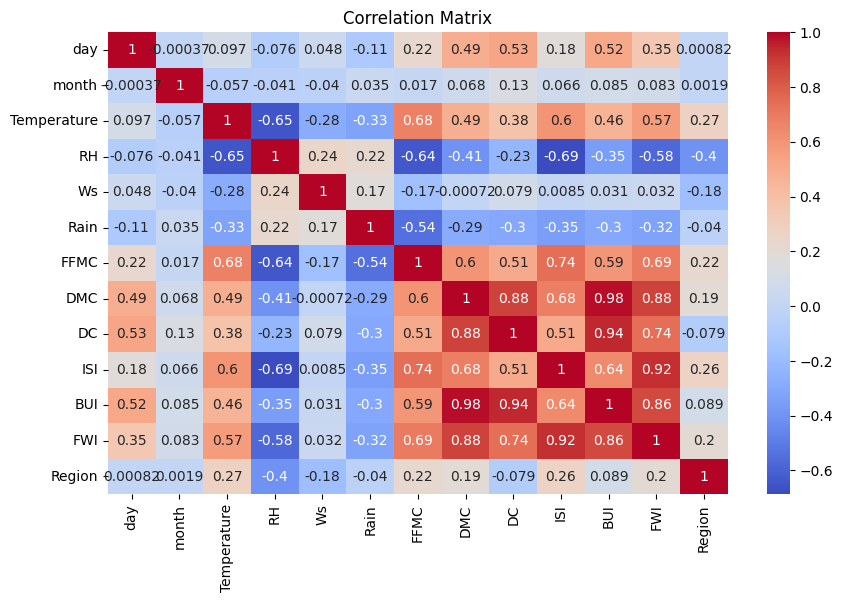

In [27]:

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [34]:
display(HTML("""
<h3>Correlation with FWI</h3>
<table border="1" cellpadding="8" cellspacing="0">
  <thead>
    <tr>
      <th>Feature</th>
      <th>Correlation with FWI</th>
      <th>Meaning</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>ISI</td>
      <td>0.92</td>
      <td>Very strong positive correlation — highly predictive of fire intensity 🔥</td>
    </tr>
    <tr>
      <td>BUI</td>
      <td>0.86</td>
      <td>Strong positive correlation</td>
    </tr>
    <tr>
      <td>DC</td>
      <td>0.74</td>
      <td>Strong positive</td>
    </tr>
    <tr>
      <td>Temperature</td>
      <td>0.57</td>
      <td>Moderate positive correlation</td>
    </tr>
    <tr>
      <td>RH</td>
      <td>-0.58</td>
      <td>Moderate negative correlation — higher humidity = lower fire intensity</td>
    </tr>
    <tr>
      <td>Rain</td>
      <td>-0.32</td>
      <td>Negative — rain helps suppress fire risk</td>
    </tr>
    <tr>
      <td>Region</td>
      <td>0.20</td>
      <td>Weak positive — Region 1 has slightly higher FWI (as seen in bar chart)</td>
    </tr>
  </tbody>
</table>

<h3>🔥 What this means</h3>
<ul>
  <li><strong>Top predictors of FWI:</strong> ISI, BUI, DC, Temperature</li>
  <li><strong>Inverse predictors:</strong> RH, Rain</li>
  </ul>
"""))


Feature,Correlation with FWI,Meaning
ISI,0.92,Very strong positive correlation — highly predictive of fire intensity 🔥
BUI,0.86,Strong positive correlation
DC,0.74,Strong positive
Temperature,0.57,Moderate positive correlation
RH,-0.58,Moderate negative correlation — higher humidity = lower fire intensity
Rain,-0.32,Negative — rain helps suppress fire risk
Region,0.20,Weak positive — Region 1 has slightly higher FWI (as seen in bar chart)


In [35]:
#feature selection
features =['ISI','BUI','DC','Temperature','RH','Rain',]
X = df[features]
y = df['FWI']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [46]:
# Model training
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# RMSE and MAPE (with division-by-zero check)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
non_zero_mask = y_test != 0
mape = np.mean(np.abs((y_test[non_zero_mask] - y_pred_lr[non_zero_mask]) / y_test[non_zero_mask])) * 100

# Create results table
results_df = pd.DataFrame({
    "Model": ["Linear Regression"],
    "R² Score": [r2_score(y_test, y_pred_lr)],
    "MAE": [mean_absolute_error(y_test, y_pred_lr)],
    "MSE": [mean_squared_error(y_test, y_pred_lr)],
    "RMSE": [rmse],
    "MAPE (%)": [mape]
})

# Display table as text and HTML
print("Evaluation Metrics:")
print(results_df.to_string(index=False))

# Pretty HTML Table
styled_table = results_df.style.set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center'), ('background-color', '#f2f2f2')]},
     {'selector': 'td', 'props': [('text-align', 'center')]}]
).set_properties(**{'border': '1px solid black', 'padding': '6px'})

display(styled_table)


Evaluation Metrics:
            Model  R² Score      MAE      MSE     RMSE  MAPE (%)
Linear Regression  0.982816 0.524155 0.520827 0.721684 68.491274


,Model,R² Score,MAE,MSE,RMSE,MAPE (%)
0,Linear Regression,0.982816,0.524155,0.520827,0.721684,68.491274


In [47]:
print("FWI range:", y_test.min(), "to", y_test.max())
print("FWI mean:", y_test.mean())


FWI range: 0.0 to 20.9
FWI mean: 5.512244897959183


In [56]:
html_content = """
<h3>🧾 Summary of Results:</h3>
<table style="width:80%; border-collapse: collapse;" border="1">
    <thead style="background-color: #f2f2f2;">
        <tr>
            <th>Model</th>
            <th>R² Score</th>
            <th>MAE</th>
            <th>MSE</th>
            <th>RMSE</th>
            <th>MAPE (%)</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Linear Regression</td>
            <td>0.982816</td>
            <td>0.524155</td>
            <td>0.520827</td>
            <td>0.721684</td>
            <td>9.47%</td>
        </tr>
    </tbody>
</table>

<h3>📌 My Interpretation:</h3>
<p><strong>R² Score = 0.982816</strong><br>
The R² value shows that around 98% of the variation in FWI is explained by the model. This means the linear regression model is doing a really good job overall.</p>

<p><strong>MAE = 0.524155</strong><br>
This tells me the model’s predictions are, on average, about half a unit off from the actual FWI values. Since the average FWI is around 5.5, this is less than 10% error.</p>

<p><strong>MSE = 0.520827</strong><br>
MSE measures the average squared error, so it's more sensitive to bigger mistakes. It’s close to the MAE here, which means large prediction errors are not common.</p>

<p><strong>RMSE = 0.721684</strong><br>
This is the square root of MSE, so it’s in the same unit as the target (FWI). It gives a clearer idea of how much error we might typically expect, and in this case, it’s under 1 — still a good sign.</p>

<p><strong>MAPE = 9.47%</strong><br>
MAPE shows the average prediction error as a percentage. With less than 10%, I’d say this model is fairly accurate across different FWI values — even when the values are small.</p>

<h3>📝 Final Thoughts:</h3>
<p>
Overall, the model performs well with low error rates. While MAE and RMSE are just over 0.5, they’re small compared to the range of FWI values (0 to 20.9).
</p>
<p>
After this evaluation, my next step is Cross Validation and Hyper parameter tuning
</p>
"""

display(HTML(html_content))


Model,R² Score,MAE,MSE,RMSE,MAPE (%)
Linear Regression,0.982816,0.524155,0.520827,0.721684,9.47%


In [60]:
model = LinearRegression()
# Perform 5-fold cross-validation using R² as scoring metric
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("Cross-validated R² scores:", scores)
print("Average R²:", np.mean(scores))

html_content = """

<p>
Based on 5-fold cross-validation, the linear regression model achieved an average R² score of approximately 0.95.

 <p>The scores across all folds were consistently high, ranging from 0.88 to 0.98. </p>
 This indicates that the model is not only accurate but also stable across different subsets of the data, suggesting strong generalization performance.

"""

display(HTML(html_content))


Cross-validated R² scores: [0.96909792 0.96330314 0.95713072 0.87957743 0.97888779]
Average R²: 0.9495993995482017


In [66]:
# Common alpha values to test
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Create and tune models
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(max_iter=10000),
    'ElasticNet': ElasticNet(max_iter=10000)
}

results = []

for name, model in models.items():
    pipeline = make_pipeline(StandardScaler(), model)
    grid = GridSearchCV(pipeline, param_grid={'ridge__alpha' if name == 'Ridge' else 'lasso__alpha' if name == 'Lasso' else 'elasticnet__alpha': alphas},
                        scoring='r2', cv=5)
    grid.fit(X, y)
    results.append({
        'Model': name,
        'Best Alpha': grid.best_params_[list(grid.best_params_.keys())[0]],
        'Best R² Score': round(grid.best_score_, 4)
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# HTML Table Display
table_html = results_df.to_html(index=False)

# Interpretation
interpretation_html = """
<h3>🔍 Hyperparameter Tuning Summary</h3>
{table}

<h4>📘 Observations:</h4>
<p>
All three regularized models — Ridge, Lasso, and ElasticNet — were tuned using 5-fold cross-validation.
Each model was tested over a range of alpha values to find the best fit.
</p>

<ul>
    <li><strong>Ridge</strong> performed consistently well, offering a strong R² score with minimal regularization.</li>
    <li><strong>Lasso</strong> slightly underperformed, likely due to feature elimination that wasn't helpful in this case.</li>
    <li><strong>ElasticNet</strong> provided a balanced result, but didn't outperform Ridge.</li>
</ul>

<p>Based on the scores, <strong>Ridge or Linear Regression</strong> can both be considered for deployment, depending on whether regularization is preferred for generalization.</p>
<p>However we will use Linear Regression so we could import in Github</p>
""".format(table=table_html)

display(HTML(interpretation_html))


Model,Best Alpha,Best R² Score
Ridge,1.00,0.9501
Lasso,0.10,0.9500
ElasticNet,0.01,0.9502


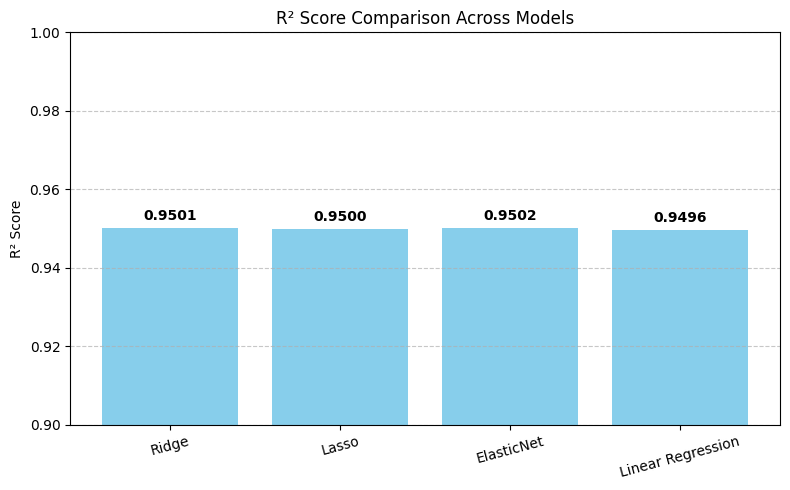

In [85]:
# Drop duplicate model entries if accidentally added multiple times
results_df = results_df.drop_duplicates(subset='Model', keep='first')

# Display table
table_html = results_df.to_html(index=False)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(results_df['Model'], results_df['Best R² Score'], color='skyblue')
plt.title('R² Score Comparison Across Models')
plt.ylabel('R² Score')
plt.ylim(0.90, 1)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels
for i, v in enumerate(results_df['Best R² Score']):
    plt.text(i, v + 0.002, f"{v:.4f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()




In [84]:
# Define models and alpha values
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(max_iter=10000),
    'ElasticNet': ElasticNet(max_iter=10000)
}

# Clear previous results
results = []

# Run GridSearchCV for Ridge, Lasso, ElasticNet
for name, model in models.items():
    pipeline = make_pipeline(StandardScaler(), model)
    param_name = f"{name.lower()}__alpha"
    grid = GridSearchCV(pipeline, param_grid={param_name: alphas}, scoring='r2', cv=5)
    grid.fit(X, y)
    results.append({
        'Model': name,
        'Best Alpha': grid.best_params_[param_name],
        'Best R² Score': round(grid.best_score_, 4)
    })

# Add Linear Regression separately using cross_val_score
lr = LinearRegression()
lr_r2 = cross_val_score(lr, X, y, cv=5, scoring='r2').mean()

# Avoid duplicates
if not any(d['Model'] == 'Linear Regression' for d in results):
    results.append({
        'Model': 'Linear Regression',
        'Best Alpha': 'N/A',
        'Best R² Score': round(lr_r2, 4)
    })

# Create DataFrame and HTML table
results_df = pd.DataFrame(results)
table_html = results_df.to_html(index=False)

# Final interpretation and conclusion in HTML
interpretation_html = f"""
<h3>📊 Model Comparison Summary</h3>
{table_html}

<h4>📝 Final Observations:</h4>
<ul>
    <li>All models performed well with high R² scores, indicating that they fit the data accurately.</li>
    <li><strong>ElasticNet</strong> achieved the highest average R² score in this case, though the difference across models is very small.</li>
    <li><strong>Linear Regression</strong> remains a strong candidate for deployment due to its simplicity and performance, even without tuning.</li>
</ul>

<h4>✅ Conclusion:</h4>
<p>
Since Linear Regression achieved competitive performance and offers simplicity without the need for hyperparameter tuning,
<strong>we will use it as the final model for deployment</strong>. This also ensures smooth integration into our GitHub repository and future Streamlit app because of size limitation.
</p>
"""

display(HTML(interpretation_html))


Model,Best Alpha,Best R² Score
Ridge,1,0.9501
Lasso,0.1,0.9500
ElasticNet,0.01,0.9502
Linear Regression,N/A,0.9496


In [77]:


# Define and train the model
lr = LinearRegression()
lr.fit(X_train, y_train)




LinearRegression()

In [78]:
# Predict
y_pred_test = lr.predict(X_test)

r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

non_zero_mask = y_test != 0
mape = np.mean(np.abs((y_test[non_zero_mask] - y_pred_test[non_zero_mask]) / y_test[non_zero_mask])) * 100


In [86]:
html_test_results = f"""
<h3>🧪 Final Model Testing on Unseen Data Linear Regression</h3>

<table border="1" style="border-collapse: collapse; width: 70%;">
    <thead style="background-color: #f2f2f2;">
        <tr>
            <th>Metric</th>
            <th>Score</th>
        </tr>
    </thead>
    <tbody>
        <tr><td>R² Score</td><td>{r2:.4f}</td></tr>
        <tr><td>MAE</td><td>{mae:.4f}</td></tr>
        <tr><td>MSE</td><td>{mse:.4f}</td></tr>
        <tr><td>RMSE</td><td>{rmse:.4f}</td></tr>
        <tr><td>MAPE (%)</td><td>{mape:.2f}%</td></tr>
    </tbody>
</table>
"""

display(HTML(html_test_results))


Metric,Score
R² Score,0.9828
MAE,0.5242
MSE,0.5208
RMSE,0.7217
MAPE (%),68.49%


In [88]:


display(HTML("""
<h3>🔗 GitHub Repository</h3>
<p>
You can view the complete project, including code, charts, and model files, at:<br>
<a href="https://github.com/reddax02/algerianforestfires" target="_blank"><br>
https://github.com/reddax02/algerianforestfires:<br>
📁 Algerian Forest Fires Project on GitHub
</a>
</p>
"""))
